# MIE524 - Assignment 2
Please complete this notebook for Assignment 2.

###Setup

In [ ]:
## imports
import pandas as pd
import numpy as np

## Q1 - Gradient Boosted Trees
Complete below code. Please do not change class and function names. You may create additional functions or define additional parameters.

### Data

In [ ]:
cal_housing_train = pd.read_csv('/content/sample_data/california_housing_train.csv')
cal_housing_test = pd.read_csv('/content/sample_data/california_housing_test.csv')

### Model

In [ ]:
# Please use the below square loss for your gradient boosted tree implementation

class SquareLoss():
    def __init__(self): pass

    def loss(self, y, y_pred):
        return 0.5 * np.power((y - y_pred), 2)

    def gradient(self, y, y_pred):
        return -(y - y_pred)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

class my_GradientBoosting(object):
    """Super class of GradientBoostingClassifier and GradientBoostinRegressor.
    Uses a collection of regression trees that trains on predicting the gradient
    of the loss function.

    Parameters:
    -----------
    n_estimators: int
        The number of classification trees that are used.
    learning_rate: float
        The step length that will be taken when following the negative gradient during
        training.
    min_samples_split: int
        The minimum number of samples needed to make a split when building a tree.
    min_impurity: float
        The minimum impurity required to split the tree further.
    max_depth: int
        The maximum depth of a tree.
    regression: boolean
        True or false depending on if we're doing regression or classification.
    """
    def __init__(self, n_estimators, learning_rate, min_samples_split,
                 min_impurity, max_depth, regression):

        # YOUR CODE HERE
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.min_samples_split = min_samples_split
        self.min_impurity = min_impurity
        self.max_depth = max_depth
        self.regression = regression

        self.loss = SquareLoss()
        self.trees = []

    def fit(self, X, y):
        # init the pred with mean val
        self.mean_value = np.mean(y)
        y_pred = np.full(len(y), self.mean_value)

        for _ in range(self.n_estimators):
            # negative grad of the loss
            gradient = self.loss.gradient(y, y_pred)

            # create a decision tree and fit
            tree = DecisionTreeRegressor(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                min_impurity_decrease=self.min_impurity
            )
            tree.fit(X, gradient)

            # update the pred
            update = self.learning_rate * tree.predict(X)
            y_pred -= update

            # add to the list of trees
            self.trees.append(tree)

    def predict(self, X):
        # init the pred with mean val
        y_pred = np.full(X.shape[0], self.mean_value)

        # make pred
        for tree in self.trees:
            update = self.learning_rate * tree.predict(X)
            y_pred -= update

        return y_pred


In [ ]:
class my_GradientBoostingRegressor(my_GradientBoosting):
    def __init__(self, n_estimators=200, learning_rate=0.5, min_samples_split=2,
                 min_var_red=1e-7, max_depth=4):

        # YOUR CODE HERE
        super().__init__(n_estimators, learning_rate, min_samples_split,
                 min_var_red, max_depth, regression=True)


### Model fitting and evaluation
Please use the below cells to train and evaluate your model on the test data.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import time

# load the data from the CSV file
train_data = pd.read_csv("/content/sample_data/california_housing_train.csv")
test_data = pd.read_csv("/content/sample_data/california_housing_test.csv")

# seperate features and target
X_train = train_data.drop('median_house_value', axis=1)
y_train = train_data['median_house_value']

X_test = test_data.drop('median_house_value', axis=1)
y_test = test_data['median_house_value']

gb_regressor = my_GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    min_samples_split=2,
    max_depth=5
    )

start_time = time.time() # measure training time
gb_regressor.fit(X_train, y_train) # fit the model to the TRAINING data
end_time = time.time() # measure training time
training_time = end_time - start_time # measure training time

y_pred = gb_regressor.predict(X_test) # predict on the TESTING data
mse = mean_squared_error(y_test, y_pred) # evaluate the model
rmse = np.sqrt(mse)

print(f"MyGradient RMSE: {rmse}")
print(f"MyGradient Training Time: {training_time} seconds")

MyGradient RMSE: 48817.5010503085
MyGradient Training Time: 12.944455862045288 seconds


**Evaluate your regressor using the provided test datasets. Report on the regressor's RMSE:** <br>
>MyGradient RMSE: 48817.5010503085<br>
>MyGradient Training Time: 12.944455862045288 seconds<br>

In [ ]:
## SKLEARN
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import time

reg = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5) # create the model using sklearn library
start_time = time.time() # measure training time
reg.fit(X_train, y_train) # fit the model to the TRAINING data
end_time = time.time() # measure training time
sk_training_time = end_time - start_time # measure training time

y_pred = reg.predict(X_test) # predict on the TESTING data

mse = mean_squared_error(y_test, y_pred)
sk_mse = np.sqrt(mse)

print(f"Sklearn RMSE: {sk_mse}")
print(f"Sklearn Training Time: {sk_training_time} seconds")

Sklearn RMSE: 48826.26248144339
Sklearn Training Time: 12.576163053512573 seconds


In [ ]:
!pip3 install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=7788bb9ad83e25dfd1871849886ccc82a68a5ccc4cf5fd54fdd5f855f856c483
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
## SPARK GRADIENT BOOSTED TREE
import pyspark
from pyspark.sql import *
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark import SparkContext, SparkConf


from pyspark.ml.regression import GBTRegressor
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline

import time

# create the session
conf = SparkConf().set("spark.ui.port", "4050")

# create the context
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession.builder.getOrCreate()

# load the data
train_data = spark.read.csv("/content/sample_data/california_housing_train.csv", header=True, inferSchema=True)
test_data = spark.read.csv("/content/sample_data/california_housing_test.csv", header=True, inferSchema=True)


# seperate the features and target column names
feature_columns = [col for col in train_data.columns if col != "median_house_value"]
target_column = "median_house_value"

# all the feature columns -> a single feature vector column
assembler = VectorAssembler(
    inputCols=feature_columns,
    outputCol="features"
)

# GBTRegressor
gbt = GBTRegressor(
    featuresCol="features",
    labelCol=target_column,
    maxIter=200,
    maxDepth=5,
    stepSize=0.1,
    seed=42
)

# Create a pipeline that assembles the features and then trains a Gradient Boosted Tree model
pipeline = Pipeline(stages=[assembler, gbt])

start_time = time.time() # measure training time
model = pipeline.fit(train_data) # fit the pipeline to TRAINING data
end_time = time.time() # measure training time
spk_training_time = end_time - start_time # measure training time

# prediction on TESTING data
predictions = model.transform(test_data)

# evaluate
evaluator = RegressionEvaluator(
    labelCol=target_column,
    predictionCol="prediction",
    metricName="rmse"
)

spk_rmse = evaluator.evaluate(predictions)
print(f"Spark RMSE: {spk_rmse}")
print(f"Spark Training Time: {spk_training_time} seconds")

Spark RMSE: 51013.17222660766
Spark Training Time: 145.39689230918884 seconds


In [ ]:
spark.stop()

**Compare both the evaluation metrics and model training time:** <br> <br>

> MyGradient RMSE: 48817.5010503085 <br>
> MyGradient Training Time: 12.944455862045288 seconds

> Sklearn RMSE: 48826.26248144339 <br>
> Sklearn Training Time: 12.576163053512573 seconds

> Spark RMSE: 51013.17222660766<br>
> Spark Training Time: 145.39689230918884 seconds<br>

## Q2 - Autoencoder
Complete below code. Please do not change class and function names. You may create additional functions or define additional parameters.

### Data

In [71]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

# datasets
minist_training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

minist_test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

# dataloader
batch_size = 100

train_loader = DataLoader(dataset=minist_training_data,shuffle=True,batch_size=batch_size)
test_loader = DataLoader(dataset=minist_test_data,shuffle=True,batch_size=batch_size)

In [72]:
import torch
from torch import nn

class my_AutoEncoder(nn.Module):
    def __init__(self, latent_dim=64):  # pass 'latent_dim' as a parameter, default 64
        super(my_AutoEncoder, self).__init__()

        self.latent_dim = latent_dim

        self.encoder = self.build_encoder()
        self.decoder = self.build_decoder()

        # ADDITIONAL PARAMETERS

    def build_encoder(self):
        encoder = nn.Sequential(
            nn.Linear(28 * 28, 512),  # Input -> H1
            nn.ReLU(),
            nn.Linear(512, 128),      # H1 -> H2
            nn.ReLU(),
            nn.Linear(128, self.latent_dim) # H2 -> Output
        )
        return encoder

    def build_decoder(self):
        decoder = nn.Sequential(
            nn.Linear(self.latent_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 512),
            nn.ReLU(),
            nn.Linear(512, 784),
            nn.Sigmoid()
        )
        return decoder

    def forward(self, x):
        return self.decoder(self.encoder(x))

    def train(self, n_epochs=5, save_interval=100):
        criterion = nn.MSELoss()  # MSE loss
        optimizer = torch.optim.Adam(self.parameters(), lr=0.001)  # Adam Optimizer

        # init lists to store output and loss
        output = []
        loss_list = []

        for epoch in range(n_epochs):
            for i, (batch_features, _) in enumerate(train_loader):
                batch_features = batch_features.view(-1, 28 * 28)  # flat the image

                optimizer.zero_grad()  # zero the gradients; make sure no gradients are accumulated

                outputs = self(batch_features)  # forward pass
                loss = criterion(outputs, batch_features)  # calculate the loss
                loss.backward()  # back pass
                optimizer.step()  # update the weights

                if i % save_interval == 0:
                  output.append(outputs) # store the output
                  loss_list.append(loss.item())  # store the loss

        return output, loss_list

####Q2 - a)

In [67]:
# DO NOT CHANGE this cell, this cell should run to train your autoencoder
my_ae = my_AutoEncoder()
outputs, losses = my_ae.train()
print(f"final MSE: {losses[-1]}")

final MSE: 0.01025670301169157


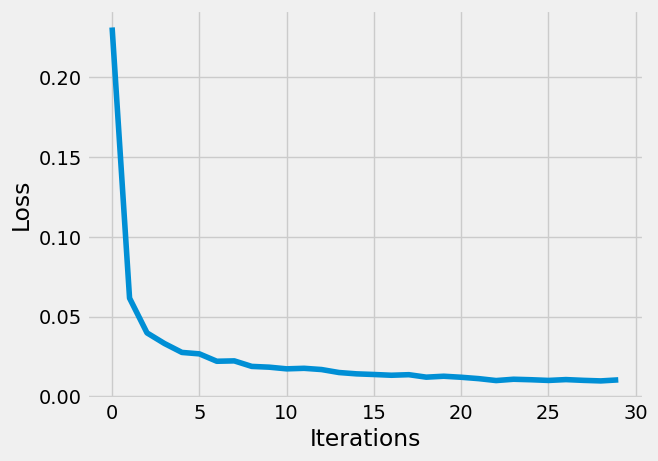

In [69]:
# Vizualize your training loss
import matplotlib.pyplot as plt
%matplotlib inline

# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')

# Plotting the last 100 values
plt.plot(losses)

Please complete the written answer in the below text box.

**Report on the final MSE:** <br>
> final MSE: 0.01025670301169157

####Q2 - b)

In [73]:
# YOUR CODE for extracting the latent representations for completing Q2 - b)

# pass through the encoder to extract the latent representations
latent_rep = my_ae.encoder(minist_test_data.data.view(-1, 28 * 28).float())

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import time

sk_clf = RandomForestClassifier(n_estimators = 20, max_features = 20,
                   min_samples_split = 2, min_impurity_decrease = 0,
                   max_depth = None, max_samples = 0.05)

# YOUR CODE for training the random forest model on the latent representations
start_time = time.time()
sk_clf.fit(latent_rep.detach().numpy(), minist_test_data.targets) # convert the torch latent representations into a NumPy array to pass into sklearn
end_time = time.time()

# accuracy
y_pred = sk_clf.predict(latent_rep.detach().numpy())
accuracy = accuracy_score(minist_test_data.targets, y_pred)
print(f"Accuracy of the model is: {accuracy}")

# f1 score
f1_score = f1_score(minist_test_data.targets, y_pred, average='macro')
print(f"F1 score of the model is: {f1_score}")

print(f"Time Taken: {end_time - start_time}")

Accuracy of the model is: 0.8861
F1 score of the model is: 0.8844296143031871
Time Taken: 0.24364256858825684


**Report Accuracy score and F1 Score:** <br>
> Accuracy of the model is: 0.8861 <br>
> F1 score of the model is: 0.8844296143031871 <br>

**How does this random forest model compare to the random forest models we have seen during the lab? Provide a short explanation of why you think it performs better or worse (no more than 5 sentences). Write your answers the provided text box.**

> The random forest model in the lab was trained on the original data, which includes a complete set of information from the images. In contrast, the code above trains the model on latent representations of the data, which capture essential features and patterns while removing some of the fine-grained details. This led to significantly faster training times for the code above, approximately 0.3 seconds, compared to the lab's model, which took around 3 seconds. Also, the accuracy of this model exceeded that of the lab's model (0.88 vs. 0.78). This demonstrates the effectiveness of the latent representation extraction, as it emphasized important features while reducing noise, resulting in improved accuracy for the model trained on latent data representations.

#### Q2 - c)

final MSE for latent_dim_32: 0.009430767968297005
Accuracy of the model with latent_dim 32 is: 0.8735
Time Taken for latent_dim 32: 0.23348760604858398
final MSE for latent_dim_16: 0.011876149103045464
Accuracy of the model with latent_dim 16 is: 0.8581
Time Taken for latent_dim 16: 0.18902945518493652
final MSE for latent_dim_8: 0.018026145175099373
Accuracy of the model with latent_dim 8 is: 0.8919
Time Taken for latent_dim 8: 0.12179851531982422


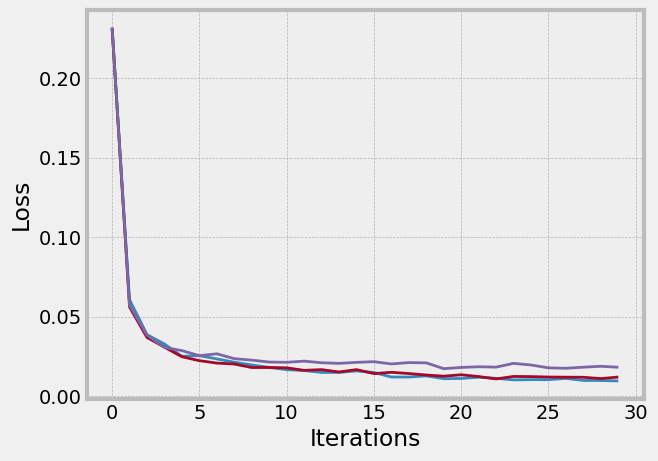

In [77]:
# YOUR CODE for changing latent space dimensions and retraining your autoencoder.
# Retrain your autoencoder with three different latent space dimensions and compare the performance of the different models.

import time

## ================== 1 ================== ##
# change the latent space dimensions
my_ae = my_AutoEncoder(latent_dim=32)
outputs, losses = my_ae.train()

# plot loss
plt.style.use('bmh')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.plot(losses, label='latent_dim_32')
print(f"final MSE for latent_dim_32: {losses[-1]}")

# extract the latent representations
latent_rep = my_ae.encoder(minist_test_data.data.view(-1, 28 * 28).float())
# print(latent_rep.shape)
# train and predict random forest model on the latent representations
start_time = time.time()
sk_clf.fit(latent_rep.detach().numpy(), minist_test_data.targets)
end_time = time.time()
y_pred = sk_clf.predict(latent_rep.detach().numpy())

# evaluate
accuracy = accuracy_score(minist_test_data.targets, y_pred)
print(f"Accuracy of the model with latent_dim 32 is: {accuracy}")
print(f"Time Taken for latent_dim 32: {end_time-start_time}")

## ================== 2 ================== ##
# change the latent space dimensions
my_ae = my_AutoEncoder(latent_dim=16)
outputs, losses = my_ae.train() # retrain

# plot loss
plt.style.use('bmh')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.plot(losses, label='latent_dim_16')
print(f"final MSE for latent_dim_16: {losses[-1]}")

# extract the latent representations
latent_rep = my_ae.encoder(minist_test_data.data.view(-1, 28 * 28).float())
# print(latent_rep.shape)
# train and predict random forest model on the latent representations
start_time = time.time()
sk_clf.fit(latent_rep.detach().numpy(), minist_test_data.targets)
end_time = time.time()
y_pred = sk_clf.predict(latent_rep.detach().numpy())

# evaluate
accuracy = accuracy_score(minist_test_data.targets, y_pred)
print(f"Accuracy of the model with latent_dim 16 is: {accuracy}")

print(f"Time Taken for latent_dim 16: {end_time-start_time}")

## ================== 3 ================== ##
# change the latent space dimensions
my_ae = my_AutoEncoder(latent_dim=8)
outputs, losses = my_ae.train() # retrain

# plot loss
plt.style.use('bmh')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.plot(losses, label='latent_dim_8')
print(f"final MSE for latent_dim_8: {losses[-1]}")

# extract the latent representations
latent_rep = my_ae.encoder(minist_test_data.data.view(-1, 28 * 28).float())
# print(latent_rep.shape)
# train and predict random forest model on the latent representations
start_time = time.time()
sk_clf.fit(latent_rep.detach().numpy(), minist_test_data.targets)
end_time = time.time()
y_pred = sk_clf.predict(latent_rep.detach().numpy())

# accuracy
accuracy = accuracy_score(minist_test_data.targets, y_pred)
print(f"Accuracy of the model with latent_dim 8 is: {accuracy}")
print(f"Time Taken for latent_dim 8: {end_time-start_time}")

Please complete the written answer in the below text box.

**Retrain your autoencoder with three different latent space dimensions and compare the performance of the different models.**

> 1. Latent Dim: 32 <br>
> final MSE for latent_dim_32: 0.009430767968297005 <br>
> Accuracy of the model with latent_dim 32 is: 0.8735 <br>
>
> 2. Latent Dim: 16 <br>
> final MSE for latent_dim_16: 0.011876149103045464 <br>
> Accuracy of the model with latent_dim 16 is: 0.8581 <br>
>
> 3. Latent Dim: 8 <br>
> final MSE for latent_dim_8: 0.018026145175099373 <br>
>Accuracy of the model with latent_dim 8 is: 0.8919 <br>
>
> It is apparent that smaller the latent representation dimension is the faster the training is. <br>
> Unlike comparing full information data trained model vs. latent representation data trained model, like in 2b, it is intuitive to expect that reducing the latent dimensions more and more will cause more loss in information and, consequently, the performance will drop. This is the observation we see between latent representation dimensions of 32 and 16.
>
>However, this is not the case when comparing to latent representations of dimension 8. It's interesting to see that the model with a latent dimension of 8 outperforms the one with a latent dimension of 32 and 16 in terms of accuracy. In this case, a smaller latent dimension seemed to have pushed the model to learn more useful and concise data representations. This resulted in better feature extraction, effectively filtering out the noise, and helping the model capture the important patterns more efficiently. As a result, the model achieved higher accuracy. A smaller latent dimension worked well for this task.
>
>This shows the importance of finetuning hyperparameters to optimize performance for a specific dataset and task.